# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

### Wenjin Tao

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import pandas as pd

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
testing_file = "traffic-signs-data/test.p"
signnames_file = "signnames.csv"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
signnames = pd.read_csv(signnames_file)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
# A glimpse of the data
print(train.keys())
print(type(X_train))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

dict_keys(['labels', 'coords', 'features', 'sizes'])
<class 'numpy.ndarray'>
(39209, 32, 32, 3)
(12630, 32, 32, 3)
(39209,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:
import numpy as np

In [4]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:4]

# TODO: How many unique classes/labels there are in the dataset.
classes_train, counts_train = np.unique(y_train, return_counts=True)
dict_classes_train = dict(zip(classes_train, counts_train))

n_classes = len(dict_classes_train)


print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [5]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

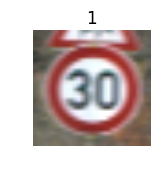

In [6]:
# Retrieve a sign image
def sign_image(idx_sign):
    """
    idx_sign is the index of the sign
    
    Return the image of a given id
    
    """
    
    img_sign = X_train[idx_sign]
    label_sign = y_train[idx_sign]
    
    return img_sign,label_sign


# Test the sign_image funciton
idx_sign = 999
img_sign, label_sign = sign_image(idx_sign)
plt.figure(figsize=(1.5,1.5))
plt.imshow(img_sign); plt.title(str(label_sign)); plt.axis('off'); plt.show()

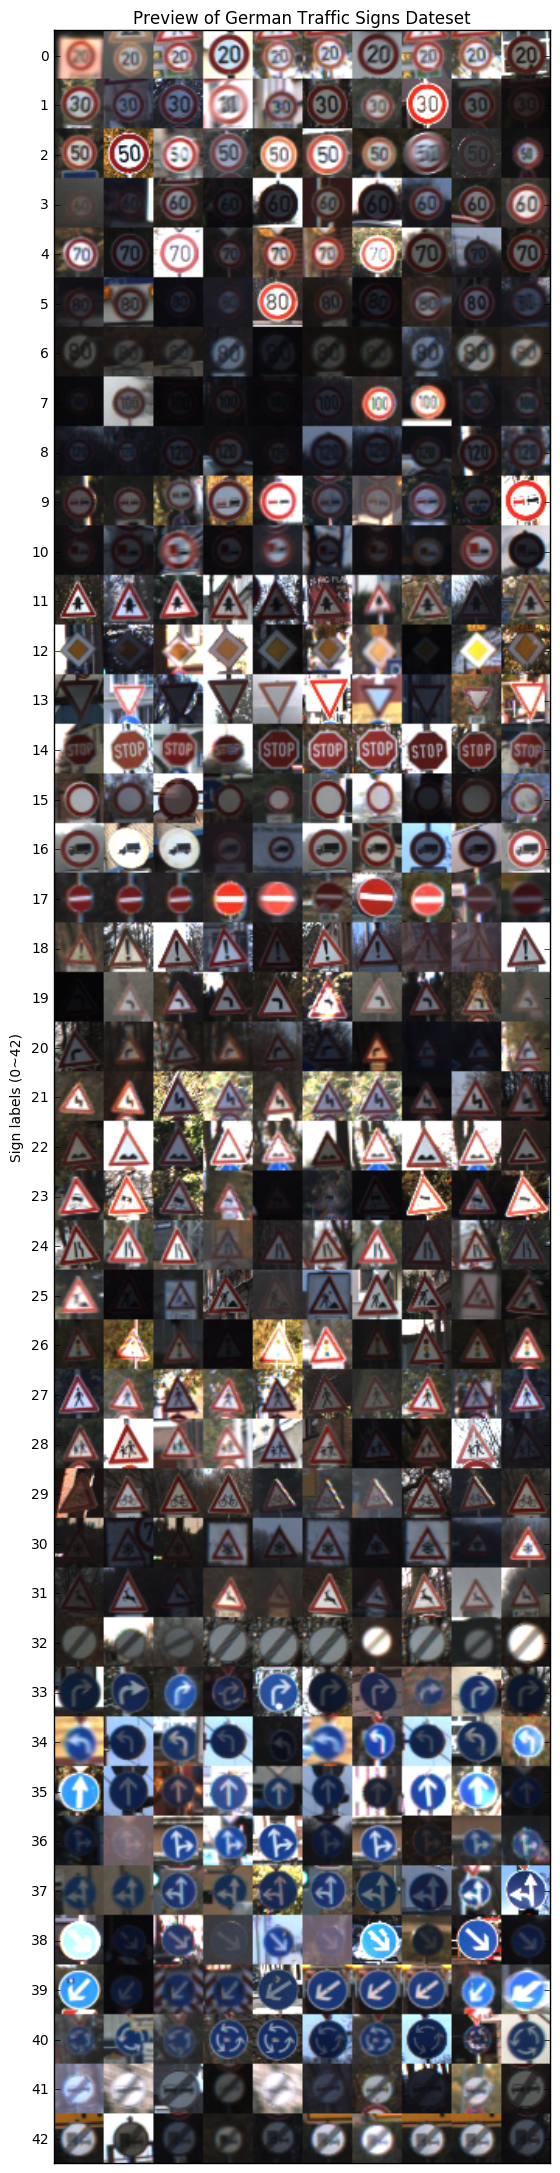

In [7]:
# Visualize each class using 10 randomly chosen samples

# Initialize a empty canvas_
canvas_ = np.empty(shape=[0,320,3], dtype='uint8')

plt.figure(figsize=(6.4, 0.64*43))

for label_i in np.arange(n_classes):
    
    # Put the indices of the same signs in a pool
    signs_pool = np.where(y_train==label_i)
    
    # Randomly select 10 indices from the signs_pool
    sampling_indices = np.random.choice(len(signs_pool[0]), 10)
    
    # Initialize the canvas for each 10 same signs
    canvas = np.empty(shape = [32,0,3],dtype='uint8')
    
    for sampling_index in sampling_indices:
        
        idx_sign = signs_pool[0][sampling_index]
        img_sign = sign_image(idx_sign)[0]
        canvas=np.append(canvas, img_sign, axis=1)  
        
    #plt.imshow(canvas); plt.axis('off'); plt.show()
    canvas_ = np.append(canvas_, canvas, axis=0)
    
plt.imshow(canvas_);
sign_labels = np.arange(n_classes)
y_pos = np.arange(n_classes)*32+16
plt.yticks(y_pos, sign_labels)
plt.xticks([])
plt.ylabel('Sign labels (0~42)')
plt.title('Preview of German Traffic Signs Dateset')
plt.show()

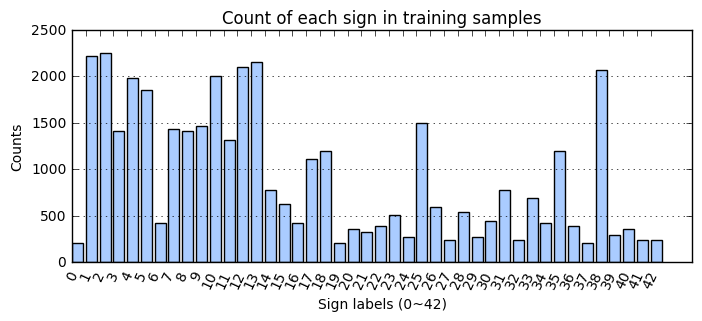

In [8]:
# Plot the count of each sign
sign_labels = np.arange(n_classes)
x_pos = np.arange(n_classes)

plt.figure(figsize=(8,3))

plt.bar(x_pos, dict_classes_train.values(), width=0.8, color='#aaccff')

plt.xticks(x_pos, sign_labels, rotation=65)
plt.ylabel('Counts')
plt.xlabel('Sign labels (0~42)')
plt.title('Count of each sign in training samples')
plt.grid(axis='y')

plt.show()

In [9]:
print("Let's list the signs which have relatively small quantities:")
print("-"*35)
for class_train in sorted(dict_classes_train, key=dict_classes_train.get):
    if dict_classes_train[class_train]<500:
        print("Class", class_train,":", dict_classes_train[class_train])

Let's list the signs which have relatively small quantities:
-----------------------------------
Class 0 : 210
Class 19 : 210
Class 37 : 210
Class 27 : 240
Class 32 : 240
Class 41 : 240
Class 42 : 240
Class 24 : 270
Class 29 : 270
Class 39 : 300
Class 21 : 330
Class 20 : 360
Class 40 : 360
Class 22 : 390
Class 36 : 390
Class 6 : 420
Class 16 : 420
Class 34 : 420
Class 30 : 450


In [10]:
# Let's list the corresponding name of each sign
signnames

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [11]:
import cv2

def fake_image(img, bright_range, shear_range, trans_range, ang_range):
    '''
    This function fake images based on the collected data.
    Input explanation:
    1- img: original image
    2- bright_range: range of values to bias the V values in HSV    
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over
    5- ang_range: Range of angles for rotation
    
    A Random uniform distribution is used to generate different parameters for transformation    
    '''
    # Bias the brightness
    v_adjust_value = np.random.randint(bright_range)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # convert it to hsv
    h, s, v = cv2.split(hsv)
    if np.mean(v) < 120:  # take this as dark, so increase the v value
        v = np.where(v > (255-v_adjust_value), 240, v+v_adjust_value)
    else:
        v = np.where(v < v_adjust_value, 15, v-v_adjust_value)
    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)    
   
    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)    
    
    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])  
    
    # Rotation
    ang_rot = np.random.uniform(ang_range)-ang_range/2
    height, width = img.shape[0:2]
    Rot_M = cv2.getRotationMatrix2D((height/2,width/2),ang_rot,1) 
    
    
    img = cv2.warpAffine(img,shear_M,(height, width))
    img = cv2.warpAffine(img,Trans_M,(height, width))
    img = cv2.warpAffine(img,Rot_M,(height, width))
   
    #img = cv2.GaussianBlur(img, (3, 3), 0)
    return img

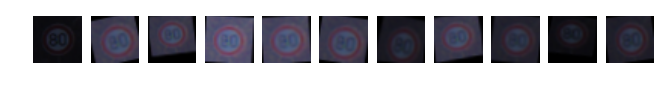

In [12]:
### Test the fake_image function
test_img = X_train[9527]
plt.figure(figsize=(8,1))
plt.subplot(1,11,1)
plt.imshow(test_img); plt.axis('off')
for i in range(10):
    fake_img = fake_image(test_img,100,5,2,30)
    plt.subplot(1,11,i+2)
    plt.imshow(fake_img); plt.axis('off')
plt.show()

In [13]:
# Here I save the raw data before the normalization
X_train_raw = X_train
y_train_raw = y_train
X_test_raw = X_test
y_test_raw = y_test

In [14]:
# Let's fake some images to amplify the training samples to N_SAMPLES
N_SAMPLES = 50

for label_i in np.arange(n_classes):
    print('Faking sign '+str(label_i)+'...')
    # Put the indices of the same signs in a pool
    signs_pool = np.where(y_train==label_i)
    
    n_samples = len(signs_pool[0])
    if n_samples < N_SAMPLES:
        
        for fake_i in np.arange(N_SAMPLES-n_samples):
            idx_basis_img = np.random.randint(n_samples)
            basis_img = sign_image(idx_basis_img)[0]
            fake_img = fake_image(basis_img, 100, 5, 2, 10)
            X_train = np.append(X_train, np.array([fake_img]),axis=0)
            y_train = np.append(y_train, label_i)
            
print('Done')

Faking sign 0...
Faking sign 1...
Faking sign 2...
Faking sign 3...
Faking sign 4...
Faking sign 5...
Faking sign 6...
Faking sign 7...
Faking sign 8...
Faking sign 9...
Faking sign 10...
Faking sign 11...
Faking sign 12...
Faking sign 13...
Faking sign 14...
Faking sign 15...
Faking sign 16...
Faking sign 17...
Faking sign 18...
Faking sign 19...
Faking sign 20...
Faking sign 21...
Faking sign 22...
Faking sign 23...
Faking sign 24...
Faking sign 25...
Faking sign 26...
Faking sign 27...
Faking sign 28...
Faking sign 29...
Faking sign 30...
Faking sign 31...
Faking sign 32...
Faking sign 33...
Faking sign 34...
Faking sign 35...
Faking sign 36...
Faking sign 37...
Faking sign 38...
Faking sign 39...
Faking sign 40...
Faking sign 41...
Faking sign 42...
Done


In [15]:
# Save the amplified training samples
# np.save('X_train_plus.npy', X_train)
# np.save('y_train_plus.npy', y_train)

In [16]:
# How many unique classes/labels there are in the dataset after the amplification.
classes_train, counts_train = np.unique(y_train, return_counts=True)
print(counts_train)

[ 210 2220 2250 1410 1980 1860  420 1440 1410 1470 2010 1320 2100 2160  780
  630  420 1110 1200  210  360  330  390  510  270 1500  600  240  540  270
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]


In [17]:
### Preprocess the data here
### Normalization

from sklearn.preprocessing import normalize

def normalize_data(original_data):
    """
    Return the normalized images
    With color values in 0.1~0.9
    """
    a = 0.1
    b = 0.9
    
    Xmin = np.min(original_data)
    Xmax = np.max(original_data)
    
    norm_data = np.empty_like(original_data, dtype=np.float32)
    norm_data = (original_data-Xmin)*(b-a)/(Xmax-Xmin) + a
    return norm_data


In [18]:
# Implement the normalization
X_train = normalize_data(X_train)
X_test = normalize_data(X_test)

In [19]:
# Check the min-max normalization
print('X_train scale:', np.min(X_train), np.max(X_train))
print('X_test scale:', np.min(X_test), np.max(X_test))

X_train scale: 0.1 0.9
X_test scale: 0.1 0.9


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

**1. Fake More Training Samples**

After some exploration on the data, I found that the training samples have unbalanced quantities among different signs. Some signs have more than 2000 samples, while some only have about 200 ones.

To tackle this problem, I faked more data to amplify the training samples for the few.

The facking process includs:

1. Bias the lightness of the original images by adjusting the Value channel in HSV mode. This is to simulate the different light conditions.

2. Shear the image to add some camera ditorsion effect.

3. Translate the image

4. Rotate the image

I think this will contribute to the robustness (e.g. lightness inviriance, distorsion invariance, position invariance) of the model.


**2. Normalization**

To reduce the variance and increase the numerical stability, I normalize the values of RGB channels to [0.1, 0.9].



## Split the data



In [ ]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

# construct the iterator
ss_split = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
ss_split.get_n_splits(X_train, y_train)
X_train_ = X_train
y_train_ = y_train
for train_index, validation_index in ss_split.split(X_train_, y_train_):   
    X_validation, X_train =  X_train_[validation_index], X_train_[train_index]
    y_validation, y_train = y_train_[validation_index], y_train_[train_index] 

In [ ]:
### Alternative method
# from sklearn.model_selection import train_test_split

# X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [21]:
# Check the split
print(X_train_raw.shape, X_train.shape, X_validation.shape)
print(y_train.shape, y_validation.shape)

(39209, 32, 32, 3) (31367, 32, 32, 3) (7842, 32, 32, 3)
(31367,) (7842,)


In [22]:
## Shuffle the training data

from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

**Shuffle & Split**: *StratifiedShuffleSplit* cross validation iterator was used to split the training dataset. This will return stratified randomized folds. The folds are made by preserving the percentage of samples for each class.

20% of the training samples were kept for validation.

The testing samples were hold for evaluating the final generalization performance of the model.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I followed the LeNet architecture because of the similarity between the digit-recognition and traffic-sign-classification problems. Also the LeNet accepts a 32x32xC image as input, where C is the number of color channels. The input of this problem are 32x32x3 images, which is perfectly fit for the LeNet.

The LeNet architecture is described below:

![LeNet Architecture](http://adilmoujahid.com/images/lenet.png)

**Layer 1: Convolutional.** Input shape: 32x32xC, Output shape: 28x28x6

**Activation.** 

**Pooling.** The output is 14x14x6

**Layer 2: Convolutional.** Output shape: 10x10x16

**Activation.** 

**Pooling.** The output is 5x5x16

**Flatten.** Flatten the output of the final pooling layer such that it's 1D instead of 3D.

**Layer 3: Fully Connected.** Output shape: 120

**Activation.** 


**Layer 4: Fully Connected.** Output shape: 84

**Activation.** 


**Layer 5: Fully Connected(Logits).** Output shape: 10


**Output**

Return hte result of the last fully connected layer.

In [ ]:
### Train your model here.
### Feel free to use as many code cells as needed.

In [23]:
### Setup TensorFlow

import tensorflow as tf

EPOCHS = 100
BATCH_SIZE = 128

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [24]:
from tensorflow.contrib.layers import flatten

def LeNet(x):
    """
    LeNet Architecture

    HINTS for layers:

        Convolutional layers:

        tf.nn.conv2d
        tf.nn.max_pool

        For preparing the convolutional layer output for the
        fully connected layers.

        tf.contrib.flatten
    """
    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # INPUT -> CONV -> ACT -> POOL -> CONV -> ACT -> POOL -> FLATTEN -> FC -> ACT -> FC
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32xC. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

** Features and labels**

x is a placeholder for a batch of input images.

y is a placeholder for a batch of output labels.

In [25]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

## Training Pipeline

Create a training pipeline that uses the model to classify the signs.

In [26]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation

Evaluate how well the loss and accuracy of the model for a given dataset

In [27]:

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x:batch_x, y:batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model

Run the training data through the training pipeline to trian the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

In [28]:
import time
start_time = time.time()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    print("EPOCH    Validation Accuracy")
    
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        validation_accuracy = evaluate(X_validation, y_validation)
        
        print("{:<4}        {:<5.3f}".format(
            i+1,
            validation_accuracy))
        
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'save_model/lenet')
    print()
    print("Model saved")

print()
elapsed_time = np.round((time.time() - start_time)/60.0)
print("Training Time ~ {} Minutes".format(elapsed_time))

Training...

EPOCH    Validation Accuracy
1           0.654

Model saved

Training Time ~ 1.0 Minutes


## Evaluate the Model

Let's evaluate the performance of the model on the test set.


In [29]:
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('save_model/lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('save_model/'))
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.947


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

**Optimizer: AdamOptimizer **

The training and parameters tuning is a critical and time-consuming step in the machine learning process. TensorFlow provides us a _tf.train_ module which has a group of objects dedicated to implement several optimization strategies.

The Optimizer class allows us to calculate gradients for a loss function and apply them to different variables of a model. A short overview about the optimizers in TensorFlow are listed below(from [2](https://www.quora.com/Which-optimizer-in-TensorFlow-is-best-suited-for-learning-regression)):

> ***GradientDescentOptimizer***: This one is sensitive to the problem and you can face lots of problems using it, from getting stuck in saddle points to oscillating around the minimum and slow convergence. I found it useful for Word2Vec, CBOW and feed-forward architectures in general, but Momentum is also good.

>***AdadeltaOptimizer***: Adadelta addresses the issues of using constant of linearly decaying learning rate. In case of recurrent networks it’s among the fastest.

>***MomentumOptimizer***: If you learn a regression and find your loss function oscillating, switching from SGD to Momentum may be the right solution.

>***_AdamOptimizer_***: Adaptive momentum in addition to the Adadelta features.

>***_FtrlOptimizer_***: I haven’t used it myself, but from the paper I see that it’s better suited for online learning on large sparse datasets, like recommendation systems.

>***_RMSPropOptimizer_***: This is a variant Adadelta that serves the same purpose - dynamic decay of a learning rate multiplier.

After doing some digging ([1](http://stats.stackexchange.com/questions/184448/difference-between-gradientdescentoptimizer-and-adamoptimizer-tensorflow) [2](https://www.quora.com/Which-optimizer-in-TensorFlow-is-best-suited-for-learning-regression) [3](http://sebastianruder.com/optimizing-gradient-descent/index.html#adam)), I learned that Adaptive Moment Estimation (Adam) method works well in practice and compares favorably to other adaptive learning-method algorithms, which would be a good choice to start. 

Then I use the following line to implement the AdamOptimizer in my model.

> optimizer = tf.train.AdamOptimizer(learning_rate = rate)



** Please discuss how did you tell a convolutional layer is well suited for this problem.**

As discussed in our classroom, the multilayer CNN trys to capture features and learn the unseen patterns on different levels. 

> The first layer is the lowest level in the hierarchy, where the CNN generally classifies small parts of the image into simple shapes like horizontal and vertical lines and simple blobs of colors. The subsequent layers tend to be higher levels in the hierarchy and generally classify more complex ideas like shapes (combinations of lines), and eventually full objects like dogs.

The traffic sign is a 32x32x3 image, which contains some low-level features like lines and curves, and some higher-level features like shapes and numbers. Therefore, this traffic sign classification problem can be model using a multilayer CNN.

Then I used the LeNet with two convolutional layers as my learning model.

** Choose the particular activation: RELU **

I used RELU as the activation function, after which is the max_pool operation to link the two layers.

** Tune the hyperparameter.**

The first parameter I specified is the *batch size*, after some digging about it, I found that:
> Batch size determines how many examples you look at before making a weight update. The lower it is, the noisier the training signal is going to be, the higher it is, the longer it will take to compute the gradient for each step.

After some trial and errors, I specify the batch size = 128, which is same with that in our LeNet-lab-project and I also got the acceptable converge results.

Other parameters used in the trial and error process are listed below:

Epochs: 10 / 50 / 100

Learning rate: 0.01 / 0.001 / 0.0001

mu: 0

sigma: 0.1

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

**How did I train the model**

I used LeNet as my learning model, run the training data through the training pipeline to trian the LeNet model. The above listed paramters were used in the trial and error process, which was in a grid-search style. The training dataset was shuffled before each epoch. After each epoch, I measured accuracy of the validation set. After all the epoches finished, I measured the acucracy of the test set.
I manually iterated this training process until I got the accuracy about 95% in the test dataset. 

Finally, this model was saved.

**How did I evaluate the model**

I use the accuracy on a given dataset (validation data or test data) to evaluate how well the learning model performs.


The steps and results of trail and error are listed below.

| Learning Rate | EPOCH | Evaluation Accuracy | Test Accuracy | Training Time|
|:---:          |:---: | :-------------------: | :-------------: | :----:|
| 0.01 | 10 | 0.933 | 0.867 | 6'|
| 0.001| 10 | 0.962 | 0.883 | 6'|
| 0.01 | 50 | 0.949 | 0.884 | 28'|
| 0.001| 50 | 0.987| 0.927 | 28' |
| 0.0001| 50 | 0.940 | 0.850 | 28'|
| **0.001**| **100** | **0.990** | **0.949** | 55' |
| 0.0001| 100| 0.964 | 0.881 | 56' |


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

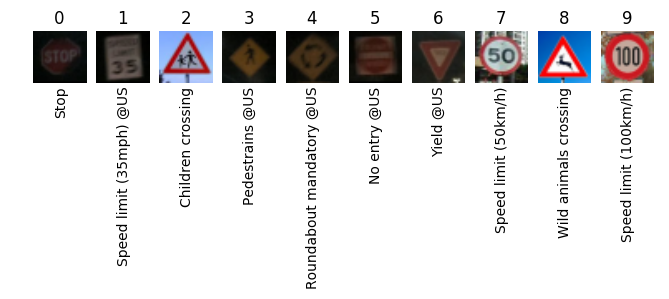

In [30]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg

new_data_dir = 'new-data/'

n_new_images = 10
new_image_labels = ['Stop', 
                    'Speed limit (35mph) @US',
                    'Children crossing',
                    'Pedestrains @US',
                    'Roundabout mandatory @US',
                    'No entry @US',
                    'Yield @US',
                    'Speed limit (50km/h)',
                    'Wild animals crossing',
                    'Speed limit (100km/h)'
                   ]
X_new = np.empty(shape=[0,32,32,3], dtype='uint8')

plt.figure(figsize=(8,1))

for i in range(n_new_images):
    
    new_img = mpimg.imread("new-data/" + str(i+1)+".png")[:,:,0:3]  # Only take the RGB channel
    new_img_scaled = cv2.resize(new_img, (32, 32), interpolation=cv2.INTER_AREA)  # Scale the image to 32x32
    plt.subplot(1,n_new_images,i+1)
    plt.imshow(new_img_scaled); plt.title(''); plt.axis('off')
    plt.text(12, 40, new_image_labels[i], rotation=90)
    plt.title(i)
    
    # Prepare the input data
    X_new = np.append(X_new, np.array([new_img_scaled]),axis=0)
    
plt.show()

In [31]:
# Implement the normalizaiton
X_new = normalize_data(X_new)

# Let's double check the scale
np.min(X_new), np.max(X_new)

(0.1, 0.90000004)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

To collect the new data, I shoot a video during my night driving, from where I cropped some traffic signs. I also downloaded some signs which are similar to our given data.

As shown in the above figure, group of #0, #2, #7, #8 and #9 are similiar with the given data.

The group of #1, #3, #4, #5 and #6 are some US traffic signs which are different with the given data in shape, color, etc. 

In [32]:
prediction = tf.argmax(logits, 1)

In [33]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    loader = tf.train.import_meta_graph('save_model/lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('save_model/'))
    
    new_pred = sess.run(prediction, feed_dict={x: X_new})
    
    print("Prediction: ", new_pred)

Prediction:  [14  1 28 12 14 17 13  5 31  7]


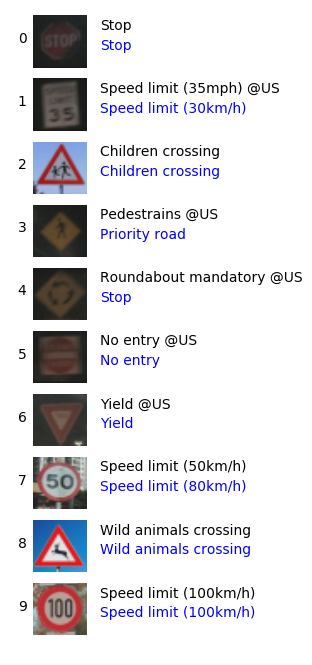

In [34]:
# Let's visualize the results
plt.figure(figsize=(8,8))

for i, sign_pred in enumerate(new_pred):
    plt.subplot(n_new_images,1,i+1)

    plt.imshow(X_new[i])
    plt.text(40, 8, new_image_labels[i], rotation=0)  # Ground truth is black
    plt.text(40, 20, signnames.SignName[sign_pred], rotation=0, color='b')  # Prediction is blue
    plt.text(-10, 16, i);
    plt.axis('off');
    
plt.show()

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

As shown in the above figure, in the group of #0, #2, #7, #8 and #9, which are similiar with the given data, four ( #0, #2, #8 and #9) out of five (4/5=80%) are correctly classified.

The #7 is classified as 'Speed limit (80km/h)', which is acturally 'Speed limit (50km/h)'.

The group of #1, #3, #4, #5 and #6 are some US traffic signs which are different with the given data in shape, color, etc. Two (#5 and #6) out of five (2/5=40%) is correctly classified.

Although we never have such kind of samples in our training data, #1 is sucessfully recognized as a speed limit. But the limit value is wrong.

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

In [35]:
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('save_model/lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('save_model/'))
    top_k = sess.run(tf.nn.top_k(tf.nn.softmax(logits), 3), feed_dict={x: X_new})
    #print(top_k)

In [36]:
# Let's check the top_k data
np.set_printoptions(suppress=True, precision=3)
print(top_k.values[0])
print(top_k.indices[0])

[ 1.  0.  0.]
[14 17 15]


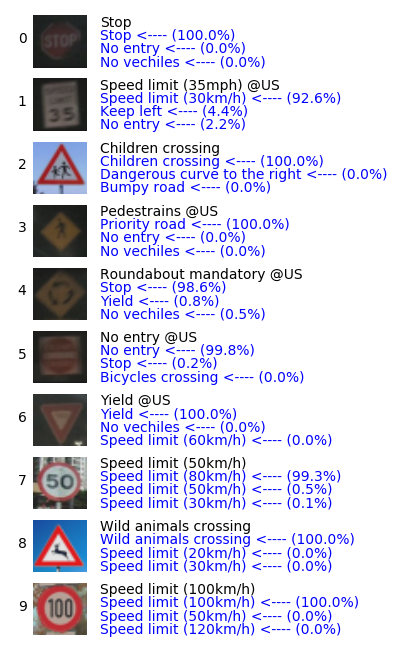

In [37]:
# Let's visualize the results
plt.figure(figsize=(8,8))

for i, sign_pred in enumerate(new_pred):
    
    plt.subplot(n_new_images,1,i+1)
    plt.imshow(X_new[i])
    
    plt.text(40, 6, new_image_labels[i], rotation=0)  # Ground truth is black
    
    y_position = 14
    for prob, idx in zip(top_k.values[i], top_k.indices[i]):
        pred_info = signnames.SignName[idx] + ' <---- (' + str(np.round(prob*100, 1)) + '%)'
        plt.text(40, y_position, pred_info, rotation=0, color='b')  # Prediction is blue
        y_position += 8
    
    plt.text(-10, 16, i);
    
    plt.axis('off');
    
plt.show()

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

As shown in the above figure, 9 predictions are the model certain of, whose softmax probabilities are > 98%. 6 out of the 9 are correct predictions. For #7, the model was incorrect in its initial prediction, but the correct prediction appear in the 2nd place.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.